## Урок 2. Масштабирование признаков. L1- и L2-регуляризация. Стохастический градиентный спуск
___

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

### 1. Напишите функцию наподобие gradient_descent_reg_l2, но для применения L1-регуляризации.
___

In [2]:
X = np.array([[   1,    1,  500,    1],
              [   1,    1,  700,    1],
              [   1,    2,  750,    2],
              [   1,    5,  600,    1],
              [   1,    3, 1450,    2],
              [   1,    0,  800,    1],
              [   1,    5, 1500,    3],
              [   1,   10, 2000,    3],
              [   1,    1,  450,    1],
              [   1,    2, 1000,    2]])

In [3]:
y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

In [4]:
def standard_scale(X):
    mean = X.mean(axis=0)
    std = X.std(axis=0)
    return (X - mean) / std

In [5]:
X_st = X.copy().astype(np.float64)
X_st[:, 1:4] = standard_scale(X_st[:, 1:4])

In [6]:
# функция рассчета mean squared error
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred) ** 2)
    return err

In [7]:
# L2 регуляризация (оригинал)
def gradient_descent_reg_l2(X, y, iterations, eta=1e-4, reg=1e-8):
    W = np.random.randn(X.shape[1]) # Вектор весов
    n = X.shape[0]

    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)

        dQ = 2/n * X.T @ (y_pred - y) #градиент функции ошибки
        dReg = reg * W #градиент регуляризации

        W -= eta * (dQ + dReg)

        if i % (iterations / 10) == 0:
            print(f"Iter: {i}, weigths: {W}, error {err}.")

    print(f"Final MSE: {calc_mse(y, np.dot(X,W))}")
    return W

In [8]:
gradient_descent_reg_l2(X_st, y, iterations=5000, eta=0.01, reg=1e-8)
# одинаковое для eta=0.01 и eta=0.1 при reg=1e-4
# одинаковое от reg=1e-8 до reg=1e-4 при eta=0.01

Iter: 0, weigths: [-0.1633611  -2.40591186  1.47869294  1.05103034], error 3518.513772186193.
Iter: 500, weigths: [56.49767516  5.75054511  1.41677407  5.28443089], error 25.439562852458245.
Iter: 1000, weigths: [56.49999962  6.16539179  0.26262739  6.06957617], error 24.971685846589203.
Iter: 1500, weigths: [56.49999972  6.2566595  -0.13456245  6.3888445 ], error 24.913302082814436.
Iter: 2000, weigths: [56.49999972  6.28654011 -0.2765945   6.50563834], error 24.90574384323549.
Iter: 2500, weigths: [56.49999972  6.29714339 -0.32766999  6.54777329], error 24.904764626464402.
Iter: 3000, weigths: [56.49999972  6.30095217 -0.34605174  6.56294432], error 24.90463776038663.
Iter: 3500, weigths: [56.49999972  6.30232272 -0.35266797  6.56840525], error 24.90462132358161.
Iter: 4000, weigths: [56.49999972  6.30281601 -0.35504942  6.57037088], error 24.904619193955217.
Iter: 4500, weigths: [56.49999972  6.30299357 -0.35590661  6.57107839], error 24.904618918006292.
Final MSE: 24.90461888224090

array([56.49999972,  6.3030574 , -0.35621479,  6.57133276])

In [9]:
# L1-регуляризация
def gradient_descent_reg_l1(X, y, iterations, eta=1e-4, reg=1e-8):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        
        dQ = 2/n * X.T @ (y_pred - y) # градиент функции ошибки
        dReg = reg * np.sign(W) # градиент регуляризации, отличие от L2
        # np.sign возвращает -1 if x < 0, 0 if x==0, 1 if x > 0 . nan возвращается для входов nan.
        
        W -= eta * (dQ + dReg)
        
        if i % (iterations / 10) == 0:
            print(f'Iter: {i}, weights: {W}, error {err}')
    
    print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    return W

In [10]:
gradient_descent_reg_l1(X_st, y, iterations=5000, eta=0.1, reg=1e-6)
# чувствительность к изменению параметров (в рамках нашего примера) почти такая же, как и для L2
# описанное выше. Но для eta=0.1 и eta=0.01 уже есть небольшое различие в финальной ошибке

Iter: 0, weights: [11.56418408  2.14705105  2.14111233  2.97327293], error 3279.8414452958214
Iter: 500, weights: [56.4999995   6.30306624 -0.35626109  6.57137155], error 24.90461887988879
Iter: 1000, weights: [56.4999995   6.30309147 -0.35638289  6.57147208], error 24.904618876914792
Iter: 1500, weights: [56.4999995   6.30309147 -0.3563829   6.57147208], error 24.90461887691479
Iter: 2000, weights: [56.4999995   6.30309147 -0.3563829   6.57147208], error 24.904618876914785
Iter: 2500, weights: [56.4999995   6.30309147 -0.3563829   6.57147208], error 24.904618876914785
Iter: 3000, weights: [56.4999995   6.30309147 -0.3563829   6.57147208], error 24.904618876914785
Iter: 3500, weights: [56.4999995   6.30309147 -0.3563829   6.57147208], error 24.904618876914785
Iter: 4000, weights: [56.4999995   6.30309147 -0.3563829   6.57147208], error 24.904618876914785
Iter: 4500, weights: [56.4999995   6.30309147 -0.3563829   6.57147208], error 24.904618876914785
Final MSE: 24.904618876914785


array([56.4999995 ,  6.30309147, -0.3563829 ,  6.57147208])

### 2. Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?
___

Имеем определения из семинара:
**Нормализация**: приведение признаков к масштабу [0..1]
**Стандартизация** заключается в получении, своего рода, значение сдвига каждого признака от среднего.
Таким образом, математически, одновременно применять эти два подхода, возможно.
Однако:
а) поиск информации в сети привел к тому, что стоит использовать один из методов
б) возвращаясь к семинару:
- Нормализовать полезно признаки, опирающиеся на величину значений, такие как расстояния (knn, k-mean)
- Стандартизировать полезно признаки для моделей, которые опираются на распределение (линейные модели)
- Если неясно что делать - создаем копию данных, для каждого набора используем свой метод и сравниваем результаты.
Последняя фраза сама за себя говорит, что одновременно не стоит использовать нормализацию и стандартизацию.

### 3. Сгенерируйте датасет при помощи <code>sklearn.datasets.make_regression</code> и обучите линейную модель при помощи градиентного и стохастического градиентного спуска. Нанесите среднеквадратичную ошибку для обоих методов на один график, сделайте выводы о разнице скорости сходимости каждого из методов.
___

In [11]:
from sklearn import datasets

X, Y, coef = datasets.make_regression(n_samples=100000, n_features=20, n_informative=10, n_targets=1,
                                      noise=1, coef=True, random_state=2)
display(X, Y, coef)

array([[-0.71760732, -1.09367119, -0.73597009, ..., -0.09194752,
         0.77271648, -0.5294093 ],
       [-0.21856062, -0.43937009,  1.17601766, ..., -0.44205731,
         0.65967443, -0.5364636 ],
       [-0.09232329, -0.04777714,  0.58128624, ..., -0.64041891,
         1.29076796, -0.34530826],
       ...,
       [-0.1724219 ,  1.20477844,  0.77081956, ...,  1.78646758,
        -0.59041036, -0.6747931 ],
       [ 0.93830193, -0.05266006,  1.45767292, ..., -1.01765261,
         0.02393901,  1.37086726],
       [-0.99582701,  1.30720547, -0.04855569, ...,  1.85683052,
        -0.26133944,  0.50888458]])

array([-136.72114621,   43.03006872,   47.20016397, ..., -271.90546582,
        161.69583213,  382.5398616 ])

array([8.03590530e+00, 9.63394753e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 7.86058430e+01, 0.00000000e+00, 0.00000000e+00,
       9.61298231e+01, 5.95379955e+01, 0.00000000e+00, 3.30583257e+01,
       3.71965212e+01, 6.59198012e-02, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 2.78539772e+01, 0.00000000e+00, 7.36381949e+01])

In [12]:
X = standard_scale(X)

In [13]:
np.random.seed(9)
init_W = np.random.randn(X.shape[1])
# функция далее будет менять init_W, поэтому для SGD сразу создадим копию весов
init_W2 = init_W.copy()
init_W

array([ 1.10855471e-03, -2.89544069e-01, -1.11606630e+00, -1.28827567e-02,
       -3.78361464e-01, -4.81135363e-01, -1.51733118e+00, -4.90871981e-01,
       -2.40680579e-01, -6.47947460e-01,  6.35891080e-01,  1.74011731e+00,
        2.96682218e-01,  7.07503662e-01,  1.82281576e+00,  4.30769029e-01,
        1.54272963e+00, -9.00721171e-01, -1.37125010e-01,  1.29757901e+00])

In [14]:
init_W2

array([ 1.10855471e-03, -2.89544069e-01, -1.11606630e+00, -1.28827567e-02,
       -3.78361464e-01, -4.81135363e-01, -1.51733118e+00, -4.90871981e-01,
       -2.40680579e-01, -6.47947460e-01,  6.35891080e-01,  1.74011731e+00,
        2.96682218e-01,  7.07503662e-01,  1.82281576e+00,  4.30769029e-01,
        1.54272963e+00, -9.00721171e-01, -1.37125010e-01,  1.29757901e+00])

In [15]:
# стохастический градиентный спуск
def stohastic_gradient_descent(W, X, Y, iterations, eta=1e-4, size=1):
    #n = X.shape[0]
    
    errors = []
    w_list = [W.copy()]
    for i in range(0, iterations):
        train_ind = np.random.randint(X.shape[0], size=size)

        y_pred = np.dot(X[train_ind], W)
        W = W - eta * 2 / Y[train_ind].shape[0] * np.dot(X[train_ind].T, y_pred - Y[train_ind])

        error = calc_mse(Y, np.dot(X, W))
        errors.append(error)
        w_list.append(W)
        
        if i % (iterations / 10) == 0:
            print(f'Iter: {i}, error {error}')
    
    print(f'Final MSE: {calc_mse(Y, np.dot(X, W))}')
    return W, errors, w_list

In [16]:
# классический  GD
def gradient_descent(W, X, y, iterations, eta=1e-4):
    n = X.shape[0]
    
    errors = []
    w_list = [W.copy()]
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        errors.append(err)
        
        dQ = 2/n * X.T @ (y_pred - y) # градиент функции ошибки
        W -= (eta * dQ)
        w_list.append(W.copy())
        
        if i % (iterations / 10) == 0:
            print(f'Iter: {i}, error {err}')
        
    print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    return W, errors, w_list

In [17]:
%%time
weights_GD, errors_GD, w_list_GD = gradient_descent(init_W, X, Y, iterations=5000, eta=1e-3)

Iter: 0, error 27955.867995557313
Iter: 500, error 3714.3084851909184
Iter: 1000, error 494.6354760832977
Iter: 1500, error 66.71033502378174
Iter: 2000, error 9.794882834599285
Iter: 2500, error 2.2195751424747847
Iter: 3000, error 1.2106028894182437
Iter: 3500, error 1.076119701118425
Iter: 4000, error 1.0581819756351332
Iter: 4500, error 1.055787679131315
Final MSE: 1.055467863232459
CPU times: user 41.9 s, sys: 7.99 s, total: 49.9 s
Wall time: 12.9 s


In [18]:
%%time
weights_SGD, errors_SGD, w_list_SGD = stohastic_gradient_descent(init_W2, X, Y, iterations=5000, eta=1e-3, size=1)

Iter: 0, error 27915.737438918863
Iter: 500, error 3898.5326703951077
Iter: 1000, error 679.1622380195024
Iter: 1500, error 93.71616614148041
Iter: 2000, error 12.985183772623488
Iter: 2500, error 2.841423705723302
Iter: 3000, error 1.3320673471104203
Iter: 3500, error 1.116461094638179
Iter: 4000, error 1.082505203787364
Iter: 4500, error 1.0763940990913605
Final MSE: 1.0709034114873026
CPU times: user 14.4 s, sys: 1.28 s, total: 15.7 s
Wall time: 3.49 s


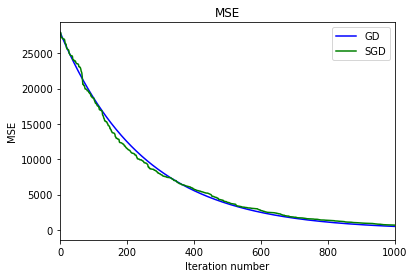

In [19]:
# Визуализируем изменение функционала ошибки
plt.plot(range(len(errors_GD)), errors_GD, color='b', label='GD')
plt.plot(range(len(errors_SGD)), errors_SGD, color='g', label='SGD')

plt.title('MSE')
plt.xlabel('Iteration number')
plt.ylabel('MSE')
plt.xlim(0, 1000)
plt.legend();

In [20]:
w_list_GD = np.array(w_list_GD)
w_list_SGD = np.array(w_list_SGD)

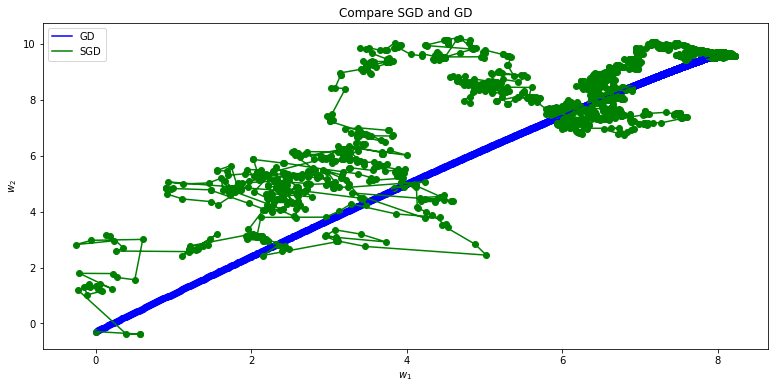

In [21]:
# Визуализируем изменение весов (красной точкой обозначены истинные веса, сгенерированные вначале)
plt.figure(figsize=(13, 6))
plt.title('Compare SGD and GD')
plt.xlabel(r'$w_1$')
plt.ylabel(r'$w_2$')

plt.scatter(w_list_GD[:, 0], w_list_GD[:, 1], color='b')
plt.plot(w_list_GD[:, 0], w_list_GD[:, 1], color='b', label='GD')

plt.scatter(w_list_SGD[:, 0], w_list_SGD[:, 1], color='g')
plt.plot(w_list_SGD[:, 0], w_list_SGD[:, 1], color='g', label='SGD')
plt.scatter(coef[0], coef[1], c='r')

plt.legend()
plt.show()